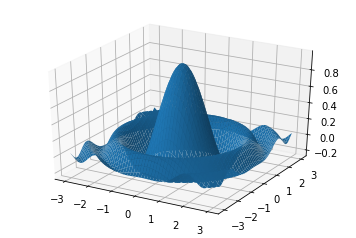

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

fig = plt.figure()
grid = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(grid, grid)
zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

In [25]:
%%timeit
grid = np.linspace(-3, 3, 1000)

m = -np.inf
for x in grid:
    for y in grid:
        z = f(x, y)
        if z > m:
            m = z

1 loop, best of 3: 3.02 s per loop


In [26]:
%%timeit
grid = np.linspace(-3, 3, 1000)
x, y = np.meshgrid(grid, grid)

100 loops, best of 3: 7.7 ms per loop


In [28]:
from numba import jit

In [29]:
def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
        x[t+1] = 4 * x[t] * (1 - x[t])
    return x
qm_numba = jit(qm)

In [30]:
%timeit qm(0.1, int(10**5))

10 loops, best of 3: 97.9 ms per loop


In [31]:
%timeit qm_numba(0.1, int(10**5))

The slowest run took 360.74 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 567 µs per loop


In [32]:
%timeit qm_numba(0.1, int(10**5))

1000 loops, best of 3: 500 µs per loop


In [34]:
%load_ext Cython

In [35]:
%%cython
def geo_prog_cython(double alpha, int n):
    cdef double current = 1.0
    cdef double sum = current
    cdef int i
    for i in range(n):
        current = current * alpha
        sum = sum + current
    return sum

In [36]:
def geo_prog(alpha, n):
    current = 1.0
    sum = current
    for i in range(n):
        current = current * alpha
        sum = sum + current
    return sum

In [37]:
%timeit geo_prog(0.99, int(10**6))

10 loops, best of 3: 172 ms per loop


In [38]:
%timeit geo_prog_cython(0.99, int(10**6))

10 loops, best of 3: 61.3 ms per loop


In [42]:
go_geo = jit(geo_prog)
%timeit go_geo(0.99, int(10**6))

10 loops, best of 3: 60.4 ms per loop


##### Exercises
Skipping these